# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from adjustText import adjust_text
import scipy.stats as stats

# Introdução

A análise de regressão é um dos mais conhecidos técnicas estatísticos que nos permite construir modelos capazes de explicar uma variável em função de outras, por exemplo, um agricultor poderia querer analisar como o crescimento de sua plantação pode ser explicado em função da quantidade de adubo e irrigação ou um governante a relação entre gastos com educação e notas no Pisa. Diferente de outros métodos já apresentados em projetos anteriores como a análise de Cluster, PCA e MCA, neste o pesquisador precisa especificar quais variáveis irá utilizar na análise, neste projeto busquei projetar uma reta que capturasse a relação de risco e retorno do mercado dos EUA através de diferentes índices representativos. 

## Reta do Mercado de Capitais
A Reta do Mercado de Capitais (Capital Market Line - CML) é uma relação teórica entre a taxa livre de risco medido pela remuneração de títulos públicos de curto prazo e os ativos com risco como uma carteira representativa do mercado de ações (S&P 500, por exemplo), é intuitivo pensar que essa reta seja ascendente visto que na medida em que se aumenta o risco deve-se aumentar o retorno esperado. Neste projeto tive como objetivo projetar uma reta com base em diferentes índices representativos do mercado dos EUA (títulos públicos, títulos privados, índices setoriais e de mercado) que pudesse capturar essa relação entre risco e retorno. 

# Base de Dados

Os dados foram coletados buscando representar de forma ampla porém não exaustiva os índices representativos do mercado dos EUA, indo desde títulos públicos de curto-prazo até ações do setor de tecnologia. 

## Dicionário da Base de Dados

In [2]:
tickers_nomes = {
    # Índices de Mercado
    '^FTW5000': 'Wilshire 5000',
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^RUT': 'Russell 2000',
    
    # Índices Setores
    '^NDX' : 'U.S. Tecnology',
    '^SP500-40': 'U.S. Financials',
    '^SP500-35': 'U.S. Healthcare',
    '^SP500-25': 'U.S. Consumer Services',
    '^SP500-50': 'U.S. Telecommunications',
    '^SP500-20': 'U.S. Industrials',
    '^SP500-30': 'U.S. Consumer Goods',
    '^SP500-15': 'U.S. Basic Materials',
    '^SP500-1010': 'U.S. Energy',

    # Corporate Bonds
    'LQD': 'Investment Grade Corporate Bond',
    'HYG': 'High Yield Corporate Bond',
    
    # Treasures
    'SHY': '1-3 Year Treasury Bond',
    'IEF': '7-10 Year Treasury Bond',
    'TIP': 'TIPS Bond',
}

## Extração de Dados com Yahoo Finance

In [3]:
indices = list(tickers_nomes.keys()) # Extraindo o código do meu dicionário
i_data = pd.DataFrame()

for i in indices:
    i_data[i] = yf.download(i, period = 'max', progress=False)['Adj Close']

In [4]:
i_data = i_data.resample('M').last().dropna() # Ajustando pro fechamento mensal
i_data

,^FTW5000,^GSPC,^DJI,^RUT,^NDX,^SP500-40,^SP500-35,^SP500-25,^SP500-50,^SP500-20,^SP500-30,^SP500-15,^SP500-1010,LQD,HYG,SHY,IEF,TIP
Date,,,,,,,,,,,,,,,,,,
2007-04-30,14952.349609,1482.369995,13062.910156,814.570007,1867.750000,497.290009,418.899994,307.410004,165.130005,339.799988,281.339996,239.229996,487.500000,55.059643,35.695068,62.178326,55.092682,60.976471
2007-05-31,15462.160156,1530.619995,13627.639648,847.179993,1928.189941,507.140015,424.390015,315.619995,180.979996,354.570007,285.149994,252.289993,523.119995,54.381973,35.828270,62.136417,54.324963,60.176788
2007-06-30,15210.650391,1503.349976,13408.620117,833.700012,1934.099976,485.410004,409.010010,310.209991,176.210007,354.500000,278.440002,250.100006,529.710022,53.941456,34.698788,62.431614,54.070900,60.047550
2007-07-31,14682.660156,1455.270020,13211.990234,776.119995,1932.060059,446.820007,390.980011,292.130005,171.119995,358.029999,271.799988,244.380005,533.450012,53.496910,33.352413,62.996166,55.291180,61.429081
2007-08-31,14847.700195,1473.989990,13357.740234,792.859985,1988.729980,452.459991,399.839996,292.820007,170.990005,357.329987,278.510010,242.479996,536.349976,54.773426,35.084759,63.656815,56.542461,61.934109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,50572.378906,5035.689941,37815.921875,1973.910034,17440.689453,671.090027,1634.439941,1420.810059,277.980011,1028.089966,805.510010,558.159973,714.950012,103.441650,74.749863,80.095787,90.338707,103.530739
2024-05-31,52875.519531,5277.509766,38686.320312,2070.129883,18536.650391,691.280029,1670.880005,1423.510010,296.230011,1042.880005,824.229980,575.270020,708.039978,105.731567,75.971230,80.672089,91.964943,105.370529
2024-06-30,54470.660156,5460.479980,39118.859375,2047.689941,19682.869141,684.260010,1700.329956,1492.140015,310.190002,1031.959961,819.859985,556.500000,698.229980,106.362076,76.335396,81.111168,93.084137,106.172943


## Retorno acumulado em janelas móveis

Os retornos foram calculados com base em janelas móveis de 5 anos e depois foram trazidos para base anuais (janelas mais curtas tinham pouca consistência e janelas muito longas perdiam muitas observações). Segue abaixo gráfico do retorno da jenela de 5 anos

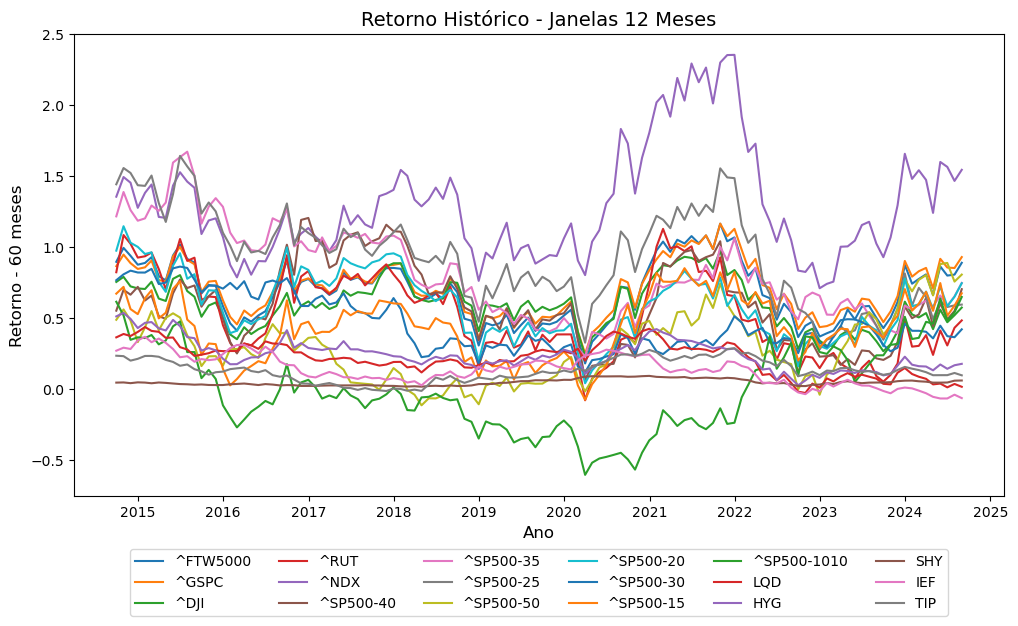

In [5]:
retorno = i_data.pct_change(periods=60).dropna() # Cálculo do retorno acumulado na janela de 5 anos

plt.figure(figsize=(12,6))

plt.plot(retorno.tail(120)) # últimos 10 anos

plt.title('Retorno Histórico - Janelas 12 Meses', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Retorno - 60 meses', fontsize = 12)
plt.legend(retorno.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)

## Calculando as Variáveis

Como estamos calculando o retorno acumulado de períodos de 5 anos, para que possamos anualiza-los foi adotado aos cálculos abaixo: 

### Retorno Geométrico

<br>
<div align="center">
$R_{\text{geom}} = \left( \prod_{i=1}^{n} (1 + R_i) \right)^{\frac{1}{n}} - 1$
</div>
    
### Volatilidade Anualizada

<br>
<div align="center">
$\sigma_{\text{anual}} = \sigma_{\text{período}} \times \sqrt{\frac{1}{anos}}$
</div>

In [6]:
ri_data = pd.DataFrame()

ri_data['Retornos'] = ((retorno+1).prod()**(1/(len(retorno)*5))-1)*100
ri_data['Volatilidade'] = ((retorno).std()*np.sqrt(1/5))*100
ri_data['Índice'] = list(tickers_nomes.values()) 
ri_data = ri_data[['Índice','Retornos','Volatilidade']]

ri_data.sort_values(by='Retornos')

,Índice,Retornos,Volatilidade
^SP500-1010,U.S. Energy,-0.049250,15.329839
SHY,1-3 Year Treasury Bond,1.080655,1.456610
TIP,TIPS Bond,3.154346,5.292871
IEF,7-10 Year Treasury Bond,3.224539,6.430941
^SP500-50,U.S. Telecommunications,4.509570,11.284380
LQD,Investment Grade Corporate Bond,4.723396,6.535151
HYG,High Yield Corporate Bond,5.334187,8.745065
^SP500-15,U.S. Basic Materials,6.823307,13.904076
^SP500-40,U.S. Financials,7.300838,19.882587
^SP500-30,U.S. Consumer Goods,7.879929,9.677839


### Gráfico de Dispersão 

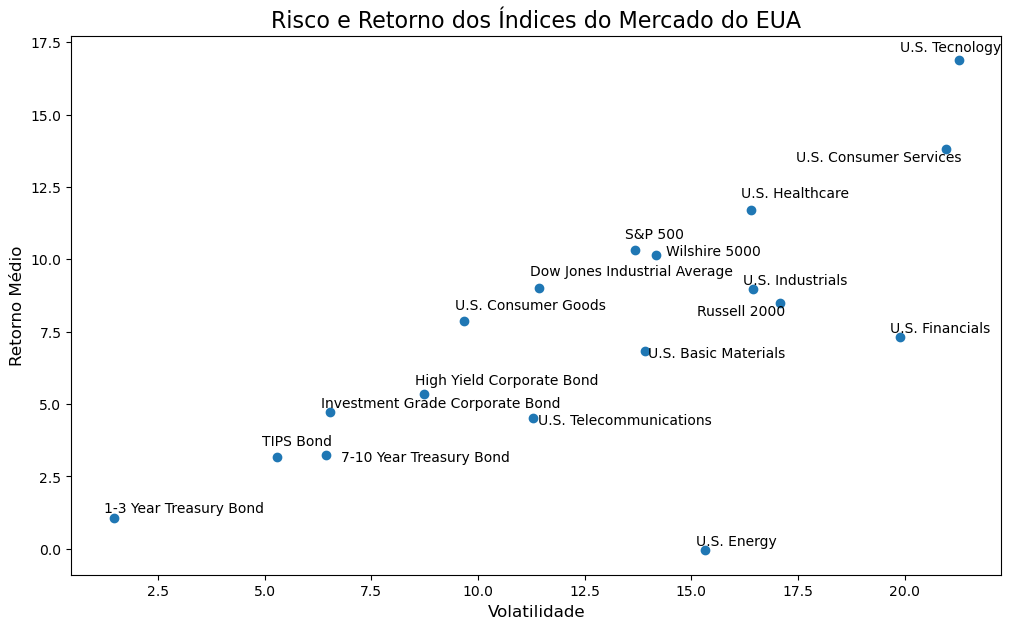

In [7]:
plt.figure(figsize=(12,7))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1])

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))

plt.xlabel('Volatilidade', fontsize = 12)
plt.ylabel('Retorno Médio', fontsize = 12)
plt.title('Risco e Retorno dos Índices do Mercado do EUA', fontsize = 16)
adjust_text(texts)

### Estatísticas Descritivas

In [8]:
ri_data.describe()

,Retornos,Volatilidade
count,18.000000,18.000000
mean,7.407206,12.776757
std,4.358738,5.628255
min,-0.049250,1.456610
25%,4.563027,8.978259
50%,7.590383,13.788210
75%,9.875752,16.434277
max,16.876037,21.277134


# Regressão Linear

A análise de regressão é uma técnica estatística que busca explicar a relação de dependência entre uma variável a ser explicada (dependente) e uma ou mais variáveis explanatórias (independentes), alguns exemplos que Woodridge traz é a relação entre produção de soja e uso de fertilizantes ou de salários e anos de estudo. Um modelo de regressão linear simples pode ser representado da seguinte forma: 

<br>
<div align="center">
$Y_i = \beta_0 + \beta_1 X_i + u_i$ 
</div>
    
$
Y_i = \text{variável dependente ou explicada} \\[1pt]
X_i = \text{variável independente ou explicativa} \\[1pt]
\beta_0 = \text{constante} \\[1pt]
\beta_1 = \text{coeficiente angular} \\[1pt]
u_i = \text{Erro}
$

## Hipóteses

Há algumas hipóteses subjacentes ao modelo que apresentadas por Fávero podem ser resumidas como:  

1. Normalidade dos Resíduos
2. Baixa correlação entre as variáveis explicativas
3. Resíduos não apresentam correlação com as variáveis explicativas 
4. Resíduos são aleatórios

## Método dos Mínimos Quadrados

O método utilizado para estimar a função de regressão é conhecido como Método dos Mínimos Quadrados (MQQ) ou Ordinary Least Squares (OLS). Por meio deste método é possível estimar uma reta formada por valores de estimados de Yi (variável dependente) em função dos valores de X (variável dependente) de tal modo que a soma do quadrado da diferença dos valores estimados e observados seja a mínima possível. 

Abaixo simulei uma função de regressão com observações aleatórias, a diferença entre o valor observado e o valor previsto pela reta de regressão é o erro (resíduo) representado em vermelho. Pode-se observar também que para cada valor de X representado pelo eixo horizontal há um valor Yi representado pelo eixo vertical que é o valor previsto (Yi). 

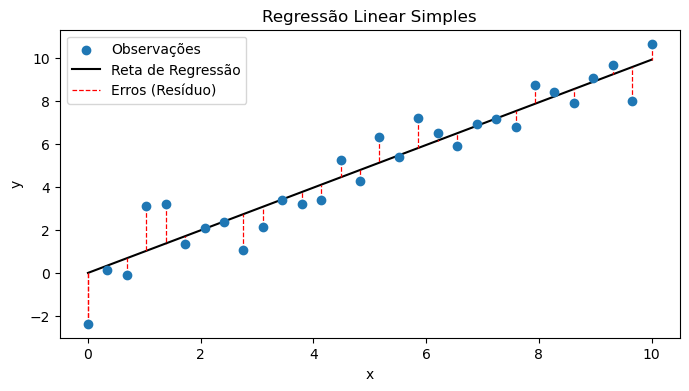

In [9]:
x = np.linspace(0, 10, 30)
y = x + np.random.normal(0, 1, x.shape)

model = sm.OLS(y, x).fit()

plt.figure(figsize=(8,4))

plt.scatter(x, y, label="Observações", zorder=3)
plt.plot(x, model.fittedvalues, color="black", label="Reta de Regressão")

for i in range(len(x)):
    plt.plot([x[i], x[i]],
             [y[i], model.fittedvalues[i]],
             color='red', linestyle='--', linewidth=0.9)

plt.plot([x[0], x[0]], [y[0], model.fittedvalues[0]], color='red', linestyle='--', label="Erros (Resíduo)", linewidth=0.9)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear Simples")
plt.legend()
plt.show()

Para quem tiver interesse, a derivação algébrica e matricial do MQO (OLS) pode ser acessada nos links abaixo: 

Algébrica: https://are.berkeley.edu/courses/EEP118/current/section/derivation.pdf

Matricial: https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

## Rodando a Regressão 

Com base nas variáveis selecionadas anteriormente, rodamos um modelo de regressão com a função OLS do statsmodels, os resultado podem ser obtidos com a instância .summary(): 

In [10]:
y = ri_data['Retornos'] # Variável Dependente
x = sm.add_constant(ri_data['Volatilidade']) # Variável Independente

modelo = sm.OLS(y, x).fit() # Modelo

modelo.summary() # Resultados

C:\Users\emanu\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retornos   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     17.31
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           0.000737
Time:                        14:49:02   Log-Likelihood:                -44.927
No. Observations:                  18   AIC:                             93.85
Df Residuals:                      16   BIC:                             95.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2744      1.865      0.147      0.885      -3.679       4.228
Volatilidade     0.5583      0.134      4.160      0.001       0.274       0.843
==============================================================================
Omnibus:                       12.099   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.581
Skew:                          -1.344   Prob(JB):                      0.00831
Kurtosis:                       5.355   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Função de Regressão

Os coeficientes podem ser obtidos com a instância .params e abaixo representamos a função de regressão estimada por OLS: 

<br>
<div align="center">
$
Retorno = 0.2509 + 0.5659 * Volatilidade
$
</div>

Obs: Leia-se, para cada 1 p.p. adicional de volatilidade, há um incremento de 0.57 p.p no retorno. 

In [11]:
modelo.params

const           0.274394
Volatilidade    0.558265
dtype: float64

## Normalidade dos Resíduos

Uma das hipóteses do MQO é que os resíduos (erros) calculados sejam normalmente distribuídos, segundo recomendado por Favero quando temos uma quantidade suficientemente grande de observações (>30) é recomendado rodar o teste de Shapiro-Francia, caso contrário recomenda-se o uso do Shapiro-Wilk. Rodamos o teste Shapiro-Wilk e a estatística foi de 0.8892 e o pvalue associado é de 0.0373, portanto podemos rejeitar a hipótese nula e afirmar que os resíduos são normalmente distribuídos a um nível de significância de 5%. 

In [15]:
statistic, pvalue = stats.shapiro(modelo.resid)
statistic, pvalue

(0.8829612731933594, 0.02928515151143074)

## Avaliação do Modelo

- F apresenta um F crítico com um p-value associado bastante baixo, isto indica que que há modelo e ao menos um dos parâmetros é diferente de zero.

- R-squared (R2) indica que a função de regressão explica em torno de 52% dos valores observados. 

- O parâmetro (β) é estatisticamente diferente de 0 a um nível de significância de 5%.

- Os resíduos (e) são normalmente distribuídos segundo o teste Shapiro-Wilk.

## Gráfico da Função de Regressão

O gráfico abaixo representa a função de regressão com um intervalo de confiança de 95%. 

<function matplotlib.pyplot.show(close=None, block=None)>

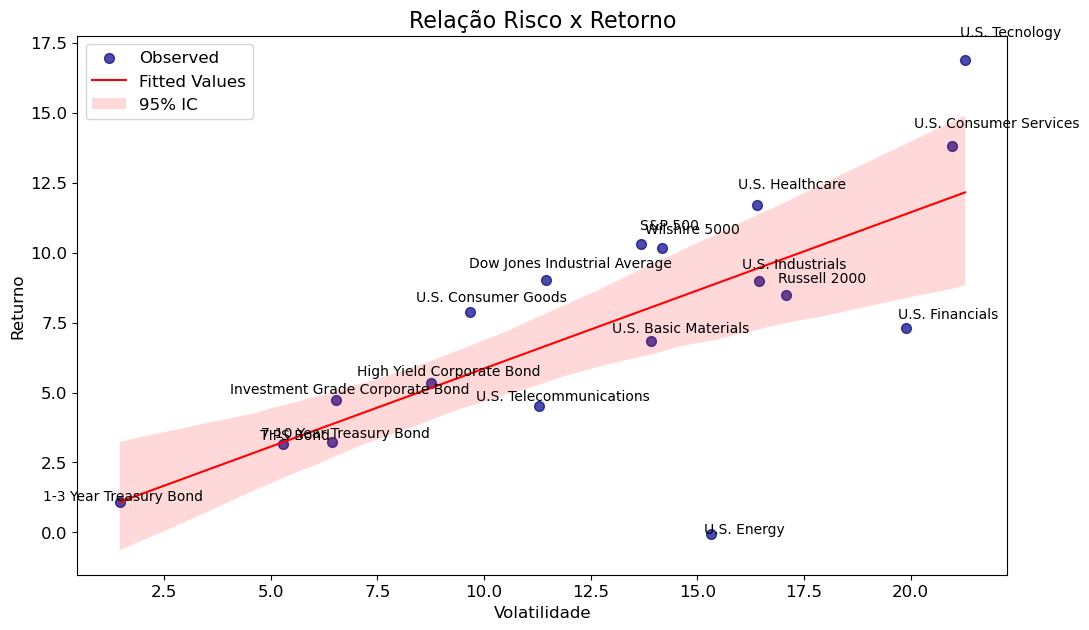

In [13]:
plt.figure(figsize=(12,7))
sns.regplot(data=ri_data, x='Volatilidade', y='Retornos', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':50},
            line_kws={"color":'red', 'linewidth': 1.5},
            color='red')
plt.title('Relação Risco x Retorno', fontsize=16)
plt.xlabel('Volatilidade', fontsize=12)
plt.ylabel('Returno', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Observed', 'Fitted Values', '95% IC'],
           fontsize=12, loc='upper left')

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2]*1.05, ri_data.iloc[i, 1]*1.05, txt, ha='center'))

plt.show

# Conclusão

Esta análise nos permitiu projeta a reta do mercado de capitais nos EUA com base no retorno e volatilidade de diferentes índices representativos do mercado, como esperado pela teoria há uma relação positiva e consistente entre risco e retorno. A função de regressão estimado nos permitiu estimar que para cada unidade adicionar de risco medido pela volatilidade é esperado um incremento de 0,57 de retorno o que pode ser um parâmetro de referência ao montar portfólios que busquem ser eficientes. É importante dizer que o período definido pode influenciar de forma significativa nos resultados.